## Tutorial in how to use intraCorr package

`intraCorr` is a `Python` package that makes use of `Pandas`, `Numpy`, `Scipy` and `SkLearn`, it can help you determine the correlation between subjects that have repeated measurements for 2 variables. For example, let's say that we measure `heigth` and `weight` of multiple persons at different times, and they don't have the same amount of observations, therefore, `ANOVA` cannot be used since `ANOVA` requires you to have the same amount of observations for each individual. Note that there are `R` packages that can do this, but we could not find any `Python` package that could do this.

In this short tutorial, we will use the data from `Bland&Altman 1995` who introduced the way to do this calculations in biostatistics. 


### References:

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5383908/pdf/fpsyg-08-00456.pdf
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2548822/pdf/bmj00580-0040.pdf
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2549010/pdf/bmj00583-0027.pdf
* https://rdrr.io/cran/rmcorr/src/R/rmcorr.R

### Authors:
* Erika Munoz
* Jose Nandez

#### Load intraCorr 

First nake sure you install intraCorr in your `virtualenv` or your `base` by means of `pip install intraCorr`.

In [1]:
from intraCorr import intraCorr

#### Load embedded dataset

In [2]:
dataTest = intraCorr.bland_altman_1995()

In [3]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
PaCO2      47 non-null float64
Subject    47 non-null int64
pH         47 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [4]:
dataTest.head()

,PaCO2,Subject,pH
0,3.9700,1,6.6800
1,4.1200,1,6.5300
2,4.0900,1,6.4300
3,3.9700,1,6.3300
4,5.2700,2,6.8500


#### Use intraCorr print_results

This method will allow you to print `ANOVA/Regression` table.

In [5]:
intraCorr('Subject','PaCO2','pH',dataTest).print_result()

          DoF  SumOfSq    MSE  F_value  p_value
Subject     7   2.9661 0.4237  48.2467  <0.0001
PaCO2       1   0.1153 0.1153  13.1313   0.0008
Residual   38   0.3337 0.0088      nan     None
Total      46   3.3139 0.0720      nan     None


#### Plot your variables
`intraCorr` contains a `plot` method can allow you to display the tendencies. Note that you might have to use `%matplotlib inline` if you are not able to see the following plot.

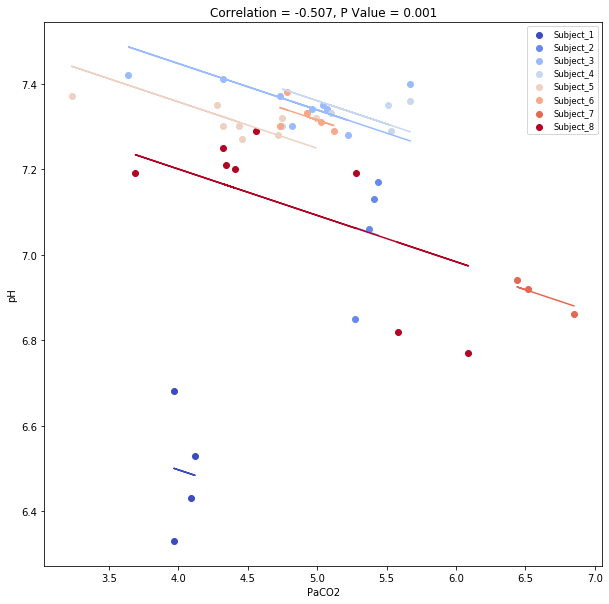

In [6]:
intraCorr('Subject','PaCO2','pH',dataTest).plot(prefix='Subject')

#### Use the correlation and p_value

In [7]:
print("Correlation = {0} with P values = {1}".format(*intraCorr('Subject','PaCO2','pH',dataTest).fit()))

Correlation = -0.5067697422330684 with P values = 0.0008471081091287977


#### Save the result for later use

In [8]:
corr, p_value = intraCorr('Subject','PaCO2','pH',dataTest).fit()

In [9]:
corr, p_value

(-0.5067697422330684, 0.0008471081091287977)

## Conclusion

You can use this method to iterate over all the variables that you have and contruct a matrix of correlations. Note that `intraCorr` uses `Pandas` as the main source for data store/managing. 